#cutout_sample

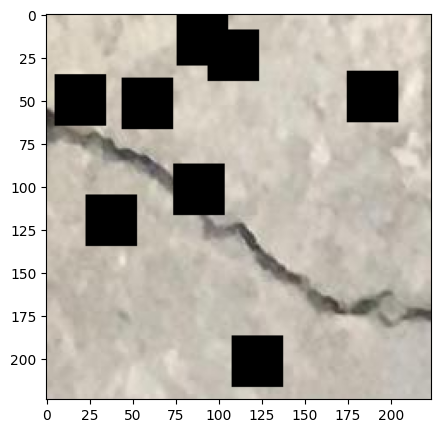

In [ ]:
import albumentations as A
import cv2
from torch.utils.data import Dataset
from albumentations.pytorch import ToTensorV2
from matplotlib import pyplot as plt
from torchvision import transforms


class AlbumentationsDataset(Dataset):

    def __init__(self, file_path, labels, transform=None):
        self.file_path = file_path
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        label = self.labels[index]
        file_path = self.file_path[index]

        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.transform:
            augmented = self.transform(image = image)
            image = augmented['image']

        return image, label

    def __len__(self):
        return len(self.file_path)


albumentations_transform  = A.Compose([
    A.Resize(227, 227),
    A.RandomCrop(224, 224),
    A.Cutout(num_holes = 8, max_h_size = 30, max_w_size = 30, p = 1.0),
    ToTensorV2()
])

albumentations_dataset = AlbumentationsDataset(
    file_path=["/content/00027.jpg"],
    labels = [1],
    transform = albumentations_transform
)

for i in range(100):
    sample, _ = albumentations_dataset[0]

plt.figure(figsize=(5, 5))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()